## 项目介绍
这是一个电子商务网站的数据。该网站非常简单，只有4页:

1.主页面。当你第一次来到网站时，你只能登陆首页作为第一页。

2.搜索页面。 在主页上，用户可以通过搜索登陆到搜索页面。

3.支付页面。在搜索页面中，如果用户点击一个产品，他将进入支付页面，并被要求提供支付相关信息来购买该产品。

4.确认页面。如果决定购买，用户最终会出现在确认页面上

## 项目要解决的问题：

公司的首席执行官对公司的销售额不太满意，尤其是来自新用户的销售额。因此，她要求你调查转化率漏斗中是否存在错误， 或者你是否可以提出一些帮助提高转换率的见解。

 1.关于用户使用手机或电脑的漏斗转化率的全图

 2.一些关于产品团队应该关注哪些内容以提高转化率的见解，以及你可能发现的有助于提高转化率的内容。

### 漏斗分析项目用到的五个数据集：user_table, home_page_table, search_page_table, payment_page_table 和 payment_confirmation_table

user_table: 用户信息

* user_id：用户id，唯一性，可以用于和别的table连接.
* date：用户第一次登录网站的日期
* device:用户设备，手机还是电脑
* sex:男/女
* home_page_table: 登录主页的用户

user_id
* page:home_page
* search_page_table:登录搜索页面的用户

user_id
* page:search_page
* payment_page_table:登录支付页面的用户

user_id
* page:payment_page
* payment_confirmation_table:登录确认页面的用户,换句话说就是已经购买好商品的用户。

user_id
* page：payment_confirmation_page

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
user_all = pd.read_csv("home_page_table.csv", index_col="user_id")
user_search = pd.read_csv("search_page_table.csv", index_col="user_id")
user_payment = pd.read_csv("payment_page_table.csv", index_col="user_id")
user_confirmation = pd.read_csv('payment_confirmation_table.csv',index_col="user_id")
user_all.head()

,page
user_id,
313593,home_page
468315,home_page
264005,home_page
290784,home_page
639104,home_page


In [3]:
user_search.head()

,page
user_id,
15866,search_page
347058,search_page
577020,search_page
780347,search_page
383739,search_page


In [5]:
#通过迭代运算，找到用户最后停留的页面
user_all.loc[user_search.index, "page"] = "search_page" #第一次迭代
user_all.loc[user_payment.index, "page"] = "payment_page" #第二次迭代
user_all.loc[user_confirmation.index, "page"] = "confirmation_page" #第三次迭代
user_all.head(10)

,page
user_id,
313593,home_page
468315,home_page
264005,home_page
290784,home_page
639104,search_page
262889,home_page
708793,home_page
943143,search_page
417894,home_page


In [6]:
users = pd.read_csv("user_table.csv", index_col="user_id")
users["final_page"] = user_all['page']
users.head()

,date,device,sex,final_page
user_id,,,,
450007,2015-02-28,Desktop,Female,home_page
756838,2015-01-13,Desktop,Male,home_page
568983,2015-04-09,Desktop,Male,search_page
190794,2015-02-18,Desktop,Female,search_page
537909,2015-01-15,Desktop,Male,home_page


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 450007 to 438929
Data columns (total 4 columns):
date          90400 non-null object
device        90400 non-null object
sex           90400 non-null object
final_page    90400 non-null object
dtypes: object(4)
memory usage: 3.4+ MB


In [10]:
users['date'] = pd.to_datetime(users.date)

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 450007 to 438929
Data columns (total 4 columns):
date          90400 non-null datetime64[ns]
device        90400 non-null object
sex           90400 non-null object
final_page    90400 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 3.4+ MB


In [15]:
def conversion_rate(df):
    churn_counts = df.final_page.value_counts()
    
    convert_counts = churn_counts.copy()
    
    total = df.shape[0]
    for i in churn_counts.index:
        
        #多少用户在这个页面流失
        n_churn = churn_counts[i]
        
        #多少用户从这个页面转化到后面其他页面
        n_convert = total - n_churn
        
        #将转化用户写入convert_counts表
        convert_counts[i] = n_convert
        
        #更新total值
        total = n_convert
      
    sc_counts = pd.concat([churn_counts, convert_counts], axis=1)
    
    return sc_counts

In [16]:
sc_counts = users.groupby("device").apply(conversion_rate)
sc_counts.columns=["n_churn", "n_conversion"]
sc_counts['conversion_rate']=sc_counts['n_conversion']/(sc_counts['n_conversion']+sc_counts['n_churn'])
sc_counts['churn_rate']=sc_counts['n_churn']/(sc_counts['n_conversion']+sc_counts['n_churn'])
sc_counts

n_churn  n_conversion  conversion_rate  churn_rate
device                                                                       
Desktop home_page            30100         30100         0.500000    0.500000
        search_page          27090          3010         0.100000    0.900000
        payment_page          2860           150         0.049834    0.950166
        confirmation_page      150             0         0.000000    1.000000
Mobile  home_page            15100         15100         0.500000    0.500000
        search_page          12080          3020         0.200000    0.800000
        payment_page          2718           302         0.100000    0.900000
        confirmation_page      302             0         0.000000    1.000000

In [17]:
data = sc_counts.reset_index()
data

,device,level_1,n_churn,n_conversion,conversion_rate,churn_rate
0,Desktop,home_page,30100,30100,0.500000,0.500000
1,Desktop,search_page,27090,3010,0.100000,0.900000
2,Desktop,payment_page,2860,150,0.049834,0.950166
3,Desktop,confirmation_page,150,0,0.000000,1.000000
4,Mobile,home_page,15100,15100,0.500000,0.500000
5,Mobile,search_page,12080,3020,0.200000,0.800000
6,Mobile,payment_page,2718,302,0.100000,0.900000
7,Mobile,confirmation_page,302,0,0.000000,1.000000


In [23]:
data.rename(columns={"level_1":"page"},inplace=True)
data

,device,page,n_churn,n_conversion,conversion_rate,churn_rate
0,Desktop,home_page,30100,30100,0.500000,0.500000
1,Desktop,search_page,27090,3010,0.100000,0.900000
2,Desktop,payment_page,2860,150,0.049834,0.950166
3,Desktop,confirmation_page,150,0,0.000000,1.000000
4,Mobile,home_page,15100,15100,0.500000,0.500000
5,Mobile,search_page,12080,3020,0.200000,0.800000
6,Mobile,payment_page,2718,302,0.100000,0.900000
7,Mobile,confirmation_page,302,0,0.000000,1.000000


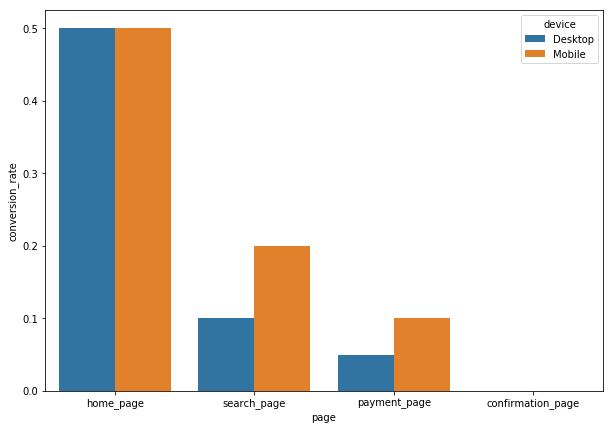

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x="page", y="conversion_rate", data=data, hue="device")
plt.show()

从上表以及图中可以看出：
1. 使用desktop浏览电商网站的用户数为60200，是使用Mobile浏览电商网站的用户数（30200）的两倍，但是最终购买完成的用户数却是使用Mobile购买完成的用户数一半。-- 收集所有浏览电商网站的相关变量，检查用desktop浏览电商网站和用mobile浏览电商网站有什么显著差异。


2. 不论是从desktop又或是mobile浏览电商网站，search_page和payment_page的转化率都是20%以下。确定问题节点为search_page和payment_page页面后，就可以开始分析该页面的数据。研究单一页面的分析工具有：热图分析（查看该页面用户的互动行为）和事件分析（查看该页面的各项数据统计指标，例如停留时长，事件数）。然后再将问题进行拆分。